In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import copy
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dj38.tsp', sep=" ", skiprows=10, header=None)
df=df.drop(df.columns[[0]], axis = 1)
df.columns=list(['x','y'])
df_ = np.asarray(df)
df

,x,y
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333
5,11297.5000,42853.3333
6,11310.2778,42929.4444
7,11416.6667,42983.3333
8,11423.8889,43000.2778
9,11438.3333,42057.2222


In [3]:
# calculate the distance 
def distance(route):
    distance=0
    for i in range(len(route)-1):
        p=df_[route[i+1]]-df_[route[i]]
        dis=math.hypot(p[0],p[1])
        distance=distance+dis
    p=df_[route[-1]]-df_[route[0]]
    # distance between last and fist city
    distance=distance+math.hypot(p[0],p[1])
    return distance

In [4]:
# plot the route
def plot_route(route_best):
    df_route=df.iloc[route_best]
    df_route.loc['origin'] =df_route.iloc[0]
    cities_route = np.asarray(df_route)

    plt.scatter(df_[:,0],df_[:,1])
    plt.plot(cities_route[:,0],cities_route[:,1])
    plt.show()
    print("Route: " + str(route_best) + "\n\nDistance_scaled: "+ str(distance(route_best)) )

In [5]:
def MCMC(N,T):
    
    time_start=datetime.datetime.now()
    print("start:",time_start)

    dis_distribution=[]
    #initial route
    route=np.arange(df.shape[0])
    dis=distance(route)
    for i in range(0,N):       
        route_new = copy.copy(route)
        
        #switch two random points
        a = random.randint(0, df.shape[0]-1)
        b = random.randint(0, df.shape[0]-1)
        route_new[a], route_new[b] = route_new[b], route_new[a]
               
        dis_new=distance(route_new)   
        
        # compare new and old route
        delta=dis_new-dis
        if delta<0:
            # accept new solution
            route=route_new 
            dis=dis_new
        else:
            # the worse new seq could still be accepted 
            if np.random.uniform(0, 1) < np.exp(-delta/T):
                route=route_new
                dis=dis_new
        
        dis_distribution.append(dis)

    time_end=datetime.datetime.now()
    duration=time_end-time_start
    print("end:",time_end)
    print("duration:",duration)
    
    return route,dis_distribution,duration

In [6]:
N=100000
T=10
route_best,distance_min_distribution,duration=MCMC(N,T)

start: 2022-01-18 21:54:58.674251
end: 2022-01-18 21:55:08.062842
duration: 0:00:09.388591


Text(0, 0.5, 'distance')

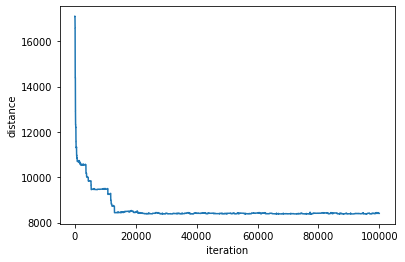

In [7]:
dis_shortest,=plt.plot(distance_min_distribution)
plt.xlabel("iteration")
plt.ylabel("distance")

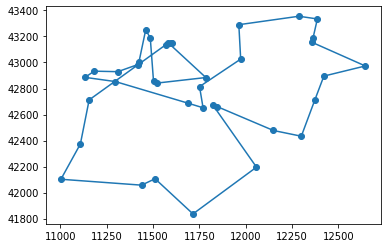

Route: [21 22 19  5  2  4  6  7  8 10 11 12 14 23 16 17 18 15  3  1  0  9 13 20
 28 24 25 29 31 34 36 37 32 33 35 30 26 27]

Distance_scaled: 8408.08857344631


In [8]:
plot_route(route_best)